In [16]:
import pandas as pd
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('gdp-per-capita-ppp-constant-2011.csv')
df.head()
y = df['GDP per capita, PPP (constant 2011 international $)']
y_train = y[:-3]
y_test = y[-3:]
df.head()

,Year,"GDP per capita, PPP (constant 2011 international $)"
0,1990,1754.857
1,1991,1737.615
2,1992,1796.532
3,1993,1845.149
4,1994,1930.113


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=269.043, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=268.855, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=268.997, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=265.836, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=267.744, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=267.579, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=269.313, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.544 seconds


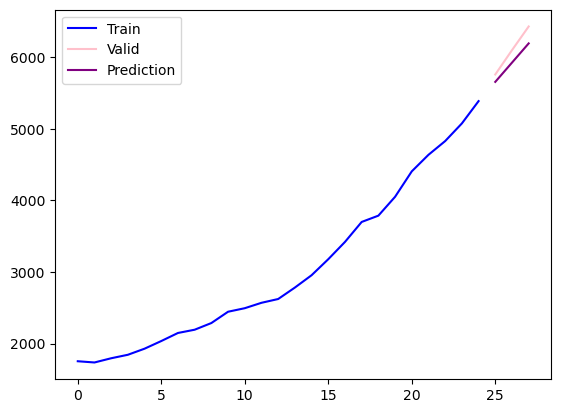

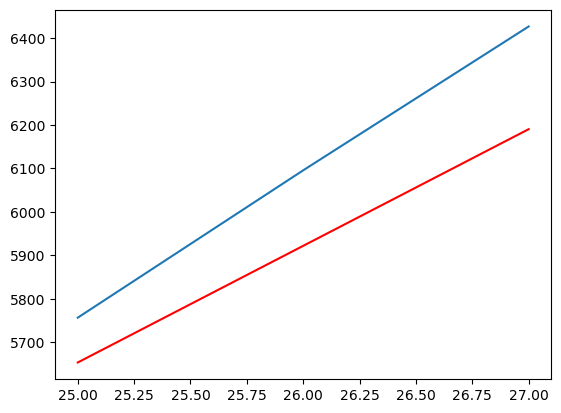

Test RMSE: 179.509


In [18]:
from numpy import sqrt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()


# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

AutoETS

In [19]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [20]:
df = pd.read_csv('gdp-per-capita-ppp-constant-2011.csv', index_col=0)
df.head()
idx = pd.PeriodIndex(df.index, freq='Y')
df.index=idx
y = df['GDP per capita, PPP (constant 2011 international $)']

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

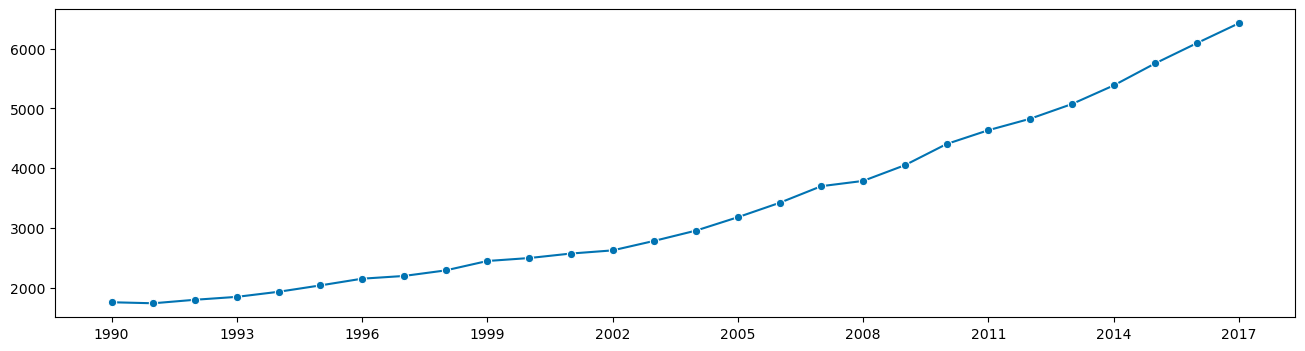

In [21]:
plot_series(df)

In [22]:
y_train, y_test = temporal_train_test_split(y,test_size=3)
print(y_train.shape, y_test.shape)

(25,) (3,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

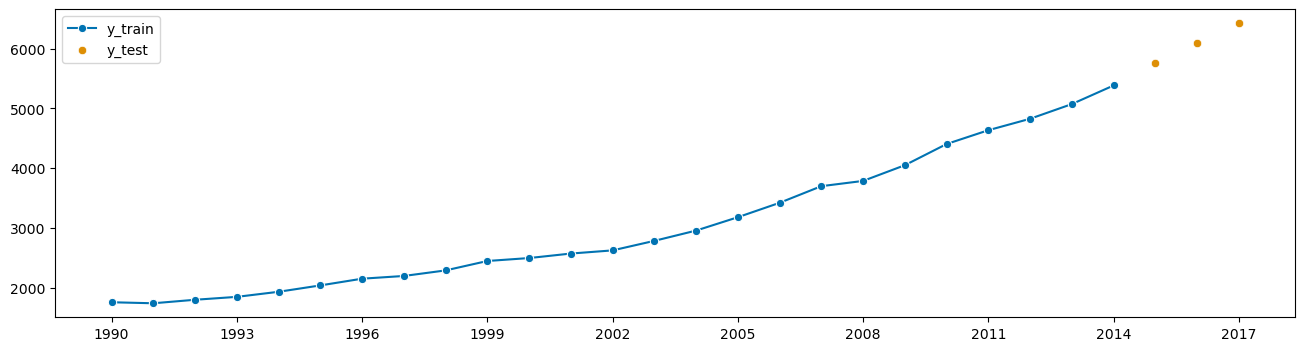

In [23]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

In [24]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2015', '2016', '2017'], dtype='period[A-DEC]', is_relative=False)

In [25]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                   25
Model:                       ETS(MAN)   Log Likelihood                -138.837
Date:                Fri, 17 Nov 2023   AIC                            287.674
Time:                        09:45:54   BIC                            293.768
Sample:                    12-31-1990   HQIC                           289.364
                         - 12-31-2014   Scale                            0.000
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.250      4.004      0.000       0.510       1.489
smoothing_trend     0.4801      0.212      2.262      0.024       0.064       0.896
initial_level    1728.6730     4

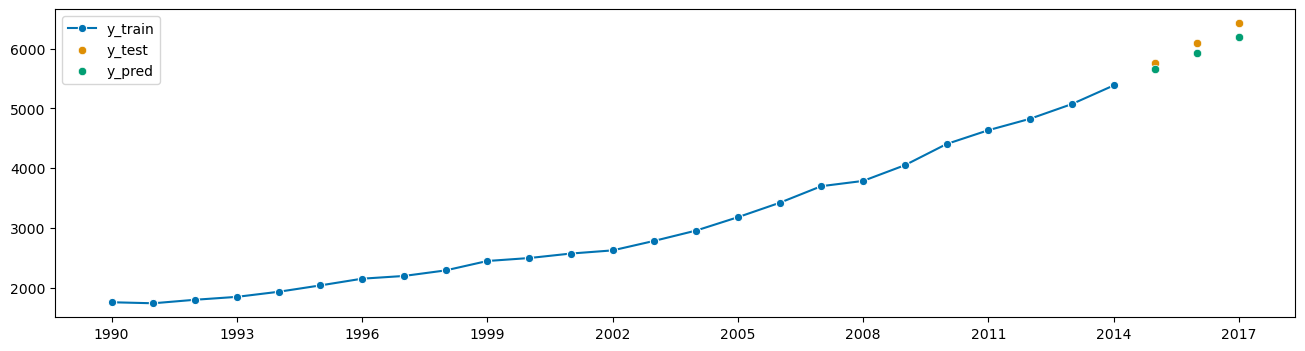

In [26]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

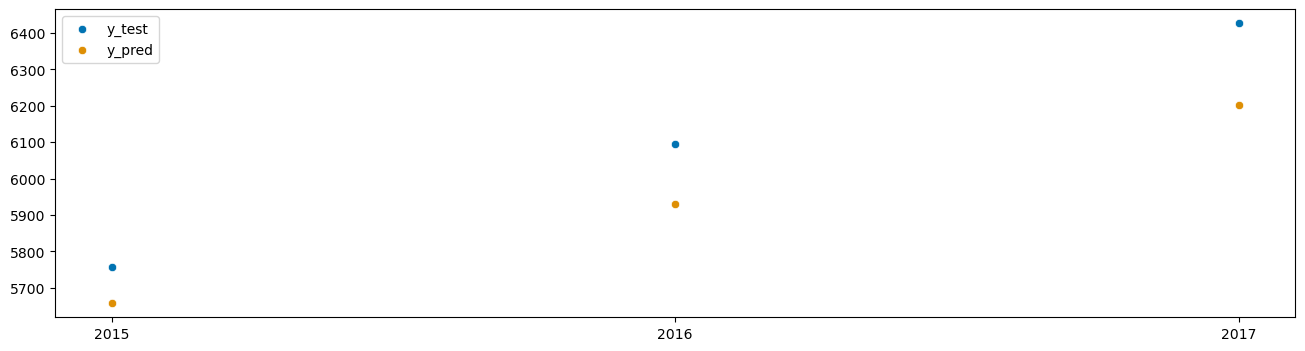

In [27]:
plot_series(y_test, y_pred, labels=['y_test', 'y_pred'])
plt.show()

In [28]:
from sktime.performance_metrics.forecasting import mean_squared_error
mean_squared_error(y_test, y_pred,square_root=True)

171.72881179473424

ExponentialSmoothing

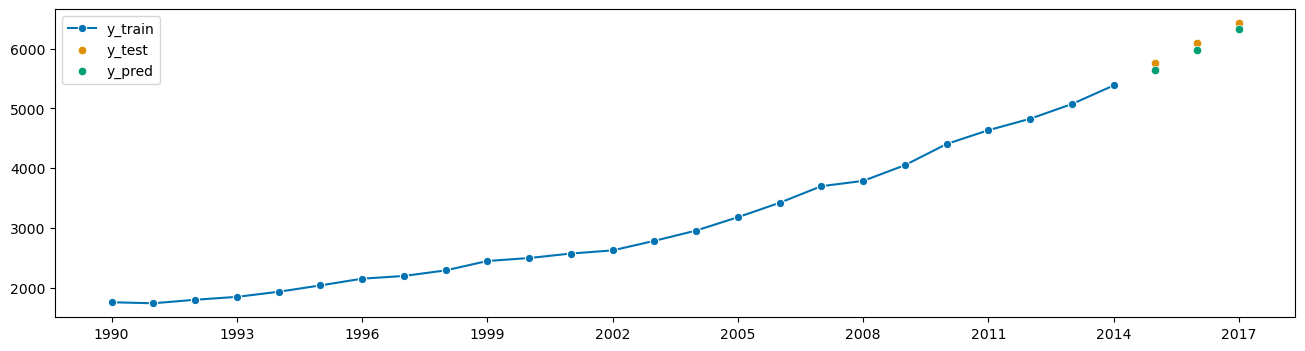

In [29]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [30]:
from sktime.performance_metrics.forecasting import mean_squared_error
mean_squared_error(y_test, y_pred,square_root=True)

108.50924824882259